In [33]:
from helpers  import getSingleExp_df
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.cloud import firestore
from matplotlib.pyplot import figure

#Change the group name printed at the end of running multi_solve.py
group = 'bet-sum8_200_1627204997'

In [34]:
#Firestore DB Client
db = firestore.Client.from_service_account_json('utp-320721-e1afef9ba011.json')

#Getting Experiment IDs 
group_Ref = db.collection('experimentGroups').document(group)
docs = group_Ref.collection('experiments').get()
df_ids ={}
for doc in docs:
    if(doc.id.split('_')[0]=='LS'):
        df_ids['LS'] = doc.id
    elif(doc.id.split('_')[0]== 'MSM'):
        df_ids['MSM'] = doc.id
    elif(doc.id.split('_')[0]=='SM'):
        df_ids['SM'] = doc.id

print(df_ids)

ls = getSingleExp_df(EID=df_ids['LS'], columns='Iteration, Best_SP')
sm = getSingleExp_df(EID=df_ids['SM'], columns='Iteration, Best_SP')
msm = getSingleExp_df(EID=df_ids['MSM'] , columns='Iteration, Best_SP')


combined = pd.DataFrame()
#combined['Iteration'] = ls['Iteration']
combined['Local_Search'] = ls['Best_SP']
combined['SM'] = sm['Best_SP']
combined['Modified_SM'] = msm['Best_SP']

combined.cumsum()

{'LS': 'LS_1627204997', 'MSM': 'MSM_1627204997', 'SM': 'SM_1627204997'}
Getting date from experiment LS_1627204997, with columns Iteration, Best_SP
Getting date from experiment SM_1627204997, with columns Iteration, Best_SP
Getting date from experiment MSM_1627204997, with columns Iteration, Best_SP


,Local_Search,SM,Modified_SM
0,177360,191700,195540
1,354720,383400,386280
2,522480,575100,572220
3,685440,766800,753360
4,848400,958500,934500
...,...,...,...
196,27977760,32042400,32362740
197,28116780,32198640,32525700
198,28255800,32354880,32688660
199,28394820,32511120,32851620


Text(0, 0.5, 'Best Search Penalty')

<Figure size 432x288 with 0 Axes>

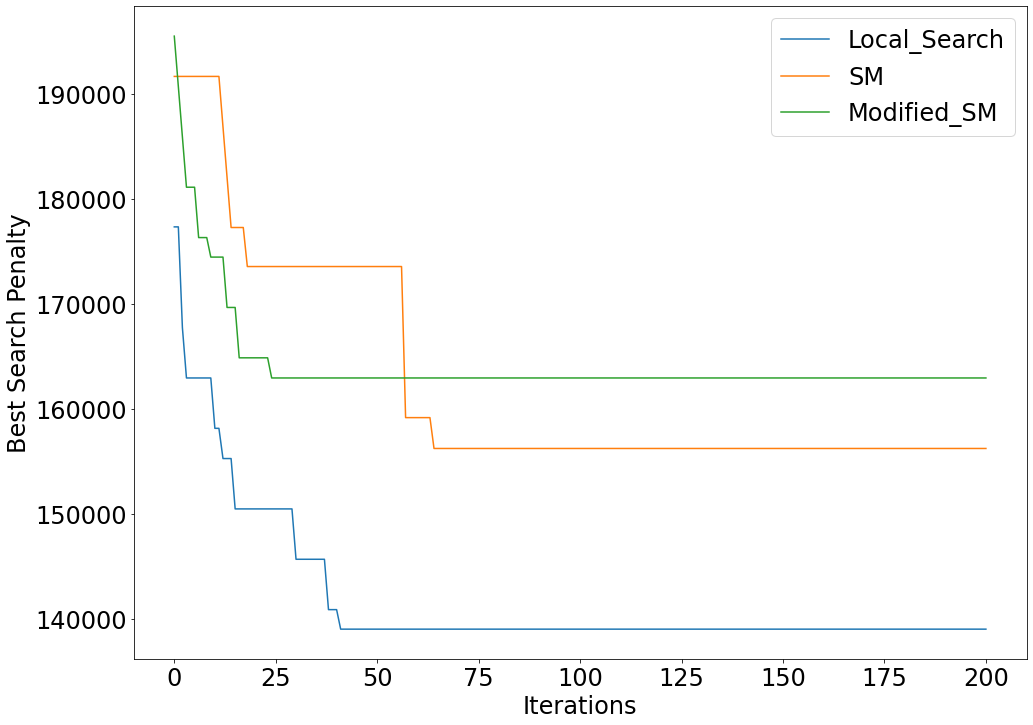

In [35]:

plt.rcParams["font.size"] = "24"
plt.figure()

ax = combined.plot(figsize=(16,12))

ax.set_xlabel("Iterations")
ax.set_ylabel("Best Search Penalty")